<a href="https://colab.research.google.com/github/drewoodward/finbudv2/blob/main/finbud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alpha Vantage functions

In [43]:
# Install the requests package in this Jupyter environment
%pip install requests
%pip install joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [44]:
import requests
import pandas as pd

In [45]:
def get_daily_prices(ticker):
  url=f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&from_symbol=EUR&to_symbol=USD&outputsize=compact&apikey=VX0VZV0L7FX3N3CS'
  r = requests.get(url)
  data = r.json()
  return pd.DataFrame(data["Time Series (Daily)"]).transpose()

In [46]:
def get_weekly_prices(ticker):
  url=f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={ticker}&from_symbol=EUR&to_symbol=USD&outputsize=compact&apikey=VX0VZV0L7FX3N3CS'
  r = requests.get(url)
  data = r.json()
  return pd.DataFrame(data["Weekly Time Series"]).transpose()

In [47]:
def get_monthly_prices(ticker):
  url=f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol={ticker}&from_symbol=EUR&to_symbol=USD&outputsize=compact&apikey=VX0VZV0L7FX3N3CS'
  r = requests.get(url)
  data = r.json()
  return pd.DataFrame(data["Monthly Time Series"]).transpose()

In [48]:
def get_sma_data(ticker):
  url=f'https://www.alphavantage.co/query?function=SMA&symbol={ticker}&from_symbol=EUR&to_symbol=USD&outputsize=compact&apikey=VX0VZV0L7FX3N3CS'
  r = requests.get(url)
  data = r.json()
  print(data)

In [49]:
ticker = "qqq"
get_sma_data(ticker)

{'Error Message': 'Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for SMA.'}


Yahoo Finance

In [50]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [51]:
import yfinance as yf
qqq = yf.Ticker("QQQ")

In [52]:
qqq = qqq.history(period="max")

In [53]:
qqq

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1999-03-10 00:00:00-05:00,43.181459,43.207853,42.468806,43.128670,5232000,0.0,0.0,0.0
1999-03-11 00:00:00-05:00,43.445388,43.696136,42.495185,43.339809,9688600,0.0,0.0,0.0
1999-03-12 00:00:00-05:00,43.181437,43.207832,41.940895,42.284023,8743600,0.0,0.0,0.0
1999-03-15 00:00:00-05:00,42.600774,43.550977,42.152067,43.498188,6369000,0.0,0.0,0.0
1999-03-16 00:00:00-05:00,43.682948,44.052472,43.207847,43.867710,4905800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2026-02-09 00:00:00-05:00,607.539978,616.460022,605.070007,614.320007,56797600,0.0,0.0,0.0
2026-02-10 00:00:00-05:00,615.309998,617.020020,611.010010,611.469971,53938900,0.0,0.0,0.0
2026-02-11 00:00:00-05:00,616.380005,617.520020,607.690002,613.109985,58575100,0.0,0.0,0.0


Plot The Price📈

<Axes: xlabel='Date'>

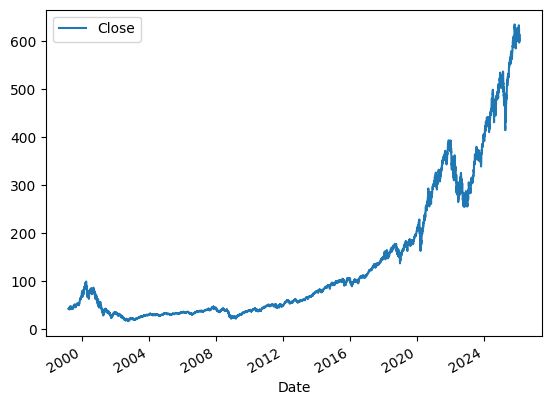

In [54]:
qqq.plot.line(y="Close", use_index=True)

Prepare And Clean The Data🧼

In [55]:
del qqq["Dividends"]
del qqq["Stock Splits"]
del qqq["Capital Gains"]

In [56]:
qqq["Tomorrow"] = qqq["Close"].shift(-1)

In [57]:
qqq["Target"] = (qqq["Tomorrow"] > qqq["Close"]).astype(int)

In [58]:
qqq

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1999-03-10 00:00:00-05:00,43.181459,43.207853,42.468806,43.128670,5232000,43.339809,1
1999-03-11 00:00:00-05:00,43.445388,43.696136,42.495185,43.339809,9688600,42.284023,0
1999-03-12 00:00:00-05:00,43.181437,43.207832,41.940895,42.284023,8743600,43.498188,1
1999-03-15 00:00:00-05:00,42.600774,43.550977,42.152067,43.498188,6369000,43.867710,1
1999-03-16 00:00:00-05:00,43.682948,44.052472,43.207847,43.867710,4905800,43.550957,0
...,...,...,...,...,...,...,...
2026-02-09 00:00:00-05:00,607.539978,616.460022,605.070007,614.320007,56797600,611.469971,0
2026-02-10 00:00:00-05:00,615.309998,617.020020,611.010010,611.469971,53938900,613.109985,1
2026-02-11 00:00:00-05:00,616.380005,617.520020,607.690002,613.109985,58575100,600.640015,0


In [59]:
#Get Rid Of Old Data
qqq = qqq.loc["2016-01-01":].copy()

In [60]:
qqq

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2016-01-04 00:00:00-05:00,101.799028,101.938543,100.562005,101.845535,50807600,101.668831,0
2016-01-05 00:00:00-05:00,102.347804,102.478017,101.194487,101.668831,38795200,100.692207,0
2016-01-06 00:00:00-05:00,99.901627,101.278165,99.901627,100.692207,41891100,97.539238,0
2016-01-07 00:00:00-05:00,98.543737,99.790070,97.483427,97.539238,61386300,96.739319,0
2016-01-08 00:00:00-05:00,98.246070,98.859937,96.637008,96.739319,69344000,97.036972,1
...,...,...,...,...,...,...,...
2026-02-09 00:00:00-05:00,607.539978,616.460022,605.070007,614.320007,56797600,611.469971,0
2026-02-10 00:00:00-05:00,615.309998,617.020020,611.010010,611.469971,53938900,613.109985,1
2026-02-11 00:00:00-05:00,616.380005,617.520020,607.690002,613.109985,58575100,600.640015,0


Model Training🏋🏽‍♀️

In [61]:
from sklearn.ensemble import RandomForestClassifier
                                                          #change this
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)


train = qqq.iloc[:-100]
test = qqq.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluate Our Model🔎

In [62]:
from sklearn.metrics import precision_score
import pandas as pd
#from sklearn.metrics import accuracy_score

preds = model.predict(test[predictors])

In [63]:
#turn numpy into a panda series
preds = pd.Series(preds, index=test.index)
preds


Date
2025-09-23 00:00:00-04:00    1
2025-09-24 00:00:00-04:00    1
2025-09-25 00:00:00-04:00    1
2025-09-26 00:00:00-04:00    1
2025-09-29 00:00:00-04:00    1
                            ..
2026-02-09 00:00:00-05:00    1
2026-02-10 00:00:00-05:00    1
2026-02-11 00:00:00-05:00    1
2026-02-12 00:00:00-05:00    1
2026-02-13 00:00:00-05:00    1
Length: 100, dtype: int64

In [64]:
precision_score(test["Target"], preds)

0.5747126436781609

Model Touch Ups💄

In [65]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

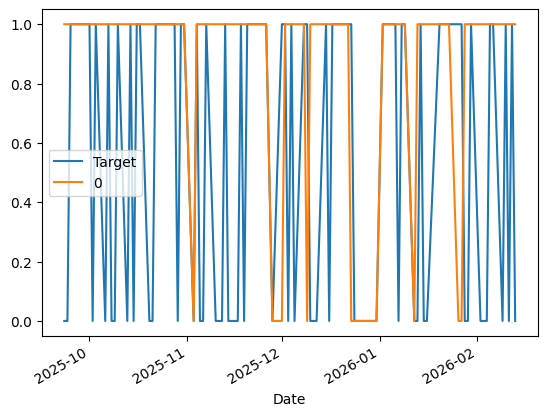

In [66]:
combined.plot()

Building A Backtesting System⚙️

In [67]:
#builds resiliance because model is tested in different scenarios
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [68]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [69]:
predictions = backtest(qqq, model, predictors, start=250)

In [70]:
predictions["Predictions"].value_counts()

Predictions
0.0    1815
1.0     479
Name: count, dtype: int64

In [71]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5657620041753654

In [72]:
#what the stock did
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.568875
0    0.431125
Name: count, dtype: float64

Add Horizons To Better Score

In [73]:
#model can see trends with horizons
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = qqq.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    qqq[ratio_column] = qqq["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    qqq[trend_column] = qqq.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [74]:
#drop null
qqq = qqq.dropna(subset=qqq.columns[qqq.columns != "Tomorrow"])

In [75]:
qqq

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2019-12-23 00:00:00-05:00,204.566046,204.710780,204.209025,204.382706,23774700,204.488907,1,1.001319,2.0,1.007180,5.0,1.066774,41.0,1.149707,150.0,1.418549,572.0
2019-12-24 00:00:00-05:00,204.566103,204.652944,204.025742,204.488907,7089000,206.293304,1,1.000260,2.0,1.004853,5.0,1.065225,41.0,1.148805,150.0,1.418274,573.0
2019-12-26 00:00:00-05:00,204.816956,206.312607,204.788009,206.293304,17067500,206.119659,0,1.004393,2.0,1.009228,5.0,1.072206,42.0,1.157384,151.0,1.429742,574.0
2019-12-27 00:00:00-05:00,207.017041,207.036344,205.569640,206.119659,18134100,204.768723,0,0.999579,1.0,1.005335,4.0,1.068628,42.0,1.154894,150.0,1.427464,574.0
2019-12-30 00:00:00-05:00,206.013481,206.138928,203.755539,204.768723,21815500,205.154678,1,0.996712,0.0,0.997846,3.0,1.059280,41.0,1.145872,149.0,1.417048,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-09 00:00:00-05:00,607.539978,616.460022,605.070007,614.320007,56797600,611.469971,0,1.003815,2.0,1.009309,2.0,0.996731,33.0,1.100792,144.0,1.462236,546.0
2026-02-10 00:00:00-05:00,615.309998,617.020020,611.010010,611.469971,53938900,613.109985,1,0.997675,1.0,1.006296,2.0,0.992343,33.0,1.095009,144.0,1.454508,545.0
2026-02-11 00:00:00-05:00,616.380005,617.520020,607.690002,613.109985,58575100,600.640015,0,1.001339,1.0,1.006557,3.0,0.994857,34.0,1.097258,144.0,1.457487,545.0


In [76]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [77]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [78]:
predictions = backtest(qqq, model, new_predictors, start=1000)

In [79]:
#what days did we predict it would go up
predictions["Predictions"].value_counts()

Predictions
1.0    381
0.0    163
Name: count, dtype: int64

In [80]:
#precision score
precision_score(predictions["Target"], predictions["Predictions"])

0.5879265091863517

In [81]:
#what the stock did
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.579044
0    0.420956
Name: count, dtype: float64

In [82]:
predictions

,Target,Predictions
Date,,
2023-12-13 00:00:00-05:00,0,1.0
2023-12-14 00:00:00-05:00,1,1.0
2023-12-15 00:00:00-05:00,1,1.0
2023-12-18 00:00:00-05:00,1,0.0
2023-12-19 00:00:00-05:00,0,0.0
...,...,...
2026-02-09 00:00:00-05:00,0,1.0
2026-02-10 00:00:00-05:00,1,1.0
2026-02-11 00:00:00-05:00,0,1.0


Saving the Model⬇️

In [83]:
import joblib

# Save the trained model
joblib.dump(model, 'qqq_model.pkl')

# Save the predictors (important for deployment)
joblib.dump(new_predictors, 'predictors.pkl')

print("Model saved successfully!")
print(f"Predictors used: {new_predictors}")

Model saved successfully!
Predictors used: ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250', 'Close_Ratio_1000', 'Trend_1000']


Adding parameters from alpha vantage to increase the score🔼